<h1 align='center'>Vocabulary for French Literature: A Systematic Approach</h1>

<h2>Contents</h2>
<ol>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#source'>Data Source and Text Extraction</a></li>
    <li><a href='#clean'>Text Cleaning</a></li>
    <li><a href='#stats'>Descriptive Statistics</a></li>
    <li><a href='#common'>Most Common Words</a></li>
    <li><a href='#corpus'>The Entire Corpus</a></li>
    <li><a href='#saving'>Saving Your Results</a></li>
</ol>

<a id='intro'></a><h2>Introduction</h2>

Suppose you have been learning French and you feel ready to work your way through a reading list of French literature in French.  For our purposes here, suppose this list consists of:
<ul>
    <li><i>Candide, ou, l'optimisme</i> by Voltaire (1759, 129 pgs.)</li>
    <li><i>Du côté de chez Swann</i> by Marcel Proust (1913, 444 pgs.)</li>
    <li><i>Jean Barois</i> by Roger Martin du Gard (1913, 500 pgs.)</li>
    <li><i>Jean-Christophe Volume 1</i> by Romain Rolland  (1905, 556 pgs.)</li>
    <li><i>Madame Bovary</i> by Gustave Flaubert  (1857, 329 pgs.) </li>
    <li><i>Notre-Dame de Paris</i> by Victor Hugo  (1831, 510 pgs.) </li>
    <li><i>Thaïs</i> by Anatole France (1890, 175 pgs.)</li>
    <li><i>Une vie</i> by Guy de Maupassant   (1883, 299 pgs.)</li>
</ul>

There will be a good amount to keep track of as you do so, e.g., cultural criticism, literary allusions, plot and themes, formality of language.  As such, to make your project a little smoother you decide to do some preparatory work and ensure that gaps in your vocabulary are minimized going in.  Then the question becomes, which words should you learn?  There are 4,291 pages in your reading list; you certainly can't learn every single word or you won't start reading for quite some time.  So, we need a method to approach such a task.

One idea would be to find a frequency list online and ensure that you have all of the most common words down pat.  But, if you look through a source like the <a href='https://en.wiktionary.org/wiki/Wiktionary:French_frequency_lists/1-2000' target='_blank'>Wiktionary</a> list, you will notice there are a substantial number of business, economic, and political terms.  I assume a large percentage of their corpus is comprised of newspaper articles, which is certainly useful if we wanted to read the archives of Le Monde, but won't be so helpful for the literature at hand.

Another idea would be to just pick up one of the texts, start at page one or pick a page at random, and just start writing down every word that you don't know.  Maybe you could make this slightly less mindnumbing by only keeping words that you find interesting.  But how does one measure the utility of a word?  "Cartilage", for example, is a useful word that is rather difficult to approximate with other language.  Yet, if it only occurs once in the 4,000 pages ahead of us, then taking the time to commit it to memory is done at the expense of another word that may occur 20 times across our texts.  So while exploring the language by following our curiosity seems fun and enriching, the intrinsic opportunity cost makes it less than ideal for efficiency within this particular project.

Hence, let's let the texts themselves dictate which words we need to know in order to work through them.  To do so, we will find the most common words (and look at some descriptive statistics to better define their utility) that occur within each individual text and across the entire corpus we have established for this project.

Ultimately, we will identify a subset of each text's vocabulary that provides at least 90% coverage of the text, specifically the subset of words that are used more than once.  Note that this does not imply that we will have 90% understanding of the text.  Many of the single-use words carry a disproportionate share of the meaning-passing within a sentence.  For example, a character might say, "Go to the grocery store and pick up some \_\_\_\_\_\_\_."  Certainly what is contained in that blank carries a substantial portion of the overall meaning.  However, our current work aims to establish enough understanding of the bulk of the text so that our example sentence doesn't appear to us as "\_\_\_ to the \_\_\_\_\_\_ and \_\_\_\_\_ some \_\_\_\_\_\_\_."  That is, the reading process will certainly be smoother if we only have to look up the occassional individual word to really understand a sentence, and we may occassionally get lucky and be able to infer the meaning using our more robust context.

Note: in the work below, I have decided to not utilize some common language parsing techniques that generally make the results more succinct.  A few of these are worth drawing attention to.  First, I do not combine verb clusters into one entry.  The verb "to be" has many conjugations across many different tenses, but we leave each of these as separate instances.  For example, 'be', 'am', 'are', 'being', and 'been' would occur as distinct items. Second, I will leave singular and plural instances as distinct entries.  For example, 'apple' and 'apples' would be separate entries.  Finally, I am not going to remove any words from the text and, specifically, this will result in proper nouns being retained.  I expect that we will find character names and places quite high in the final rankings.  All of these will inflate our numbers relative to the work of others, but I think this setup is preferable for the problem at hand.

Also, you have noticed the arguably strange choice I am making to discuss French texts using English examples.  The technical aspects I have written below are language agnostic and are not built to be applied only to French works.  As such, I would like to make our discussion as broadly relatable as possible and not presume any French knowledge on your behalf.


<a id='source'></a><h2>Data Source and Text Extraction</h2>

We will be using epub files acquired from <a href='https://www.gutenberg.org/' target='_blank'>Project Gutenberg</a>.  So, to begin we will setup our environment and write some functions that leverage the EbookLib and Beautiful Soup libraries to convert our epubs into strings. Note: Project Gutenberg does provide plain text files if you would like to skip this step.

In [13]:
#environment setup
import ebooklib
from ebooklib import epub
from bs4 import BeautifulSoup
import unicodedata
from collections import Counter
import io

In [14]:
#using ebooklib to parse the epub files
def epubHtml(epub_path):
    book = epub.read_epub(epub_path)
    chapters = []
    for item in book.get_items():
        if item.get_type() == ebooklib.ITEM_DOCUMENT:
            chapters.append(item.get_content())
    return chapters

In [15]:
#sections of the document we don't want to include in our text output
blacklist = ['noscript','[document]','header','head','html','script','meta','input']

In [16]:
#to be used incrementally in the htmlText function,using beautiful soup to parse the html that the epubHTML function yields
def chaptersText(chapters):
    output = ''
    soup = BeautifulSoup(chapters, 'html.parser')
    text = soup.find_all(text=True)
    for t in text:
        if t.parent.name not in blacklist:
            output += '{} '.format(t)
    return output

In [17]:
#process the above result into array of text and return as a single string
def htmlText(html):
    components = []
    for html in html:
        text =  chaptersText(html)
        components.append(text)
    text_string = ' '.join(components)
    return text_string

In [18]:
#just combine the above into a one step application
def epubText(epub_path):
    chapters = epubHtml(epub_path)
    text = htmlText(chapters)
    return text

In [19]:
#now apply to all of our texts
voltaire_raw = epubText('Candide, ou, loptimisme by Voltaire.epub')
proust_raw = epubText('Du côté de chez Swann by Marcel Proust.epub')
gard_raw = epubText('Jean Barois by Roger Martin du Gard.epub')
rolland_raw = epubText('Jean-Christophe Volume 1 by Romain Rolland.epub')
flaubert_raw = epubText('Madame Bovary by Gustave Flaubert.epub')
hugo_raw = epubText('Notre-Dame de Paris by Victor Hugo.epub')
france_raw = epubText('Thaïs by Anatole France.epub')
maupassant_raw = epubText('Une vie by Guy de Maupassant.epub')

While we have finished parsing our epub files into a more useable format, if we look at one of our results,







In [20]:
voltaire_raw[0:1000]

"The Project Gutenberg EBook of Candide, by Voltaire This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever.\xa0 You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org.\xa0 If you are not located in the United States, you'll have to check the laws of the country where you are located before using this ebook. Title: Candide \xa0\xa0\xa0\xa0\xa0\xa0 ou L'optimisme Author: Voltaire Release Date: July 5, 2019 [EBook #59859] Language: French *** START OF THIS PROJECT GUTENBERG EBOOK CANDIDE *** Produced by Laura Natal Rodrigues at Free Literature (Images generously made available by Gallica, Bibliothèque nationale de France.) \n CANDIDE OU L'OPTIMISME \n VOLTAIRE \n Préface de Francisque Sarcey \n Illustrations de Adrien Moreau \n Librairie Artistique—G. Boudet, Éditeur \n 197, Boulevard Saint-Germain,

we find that there are numerous items that we don't want to include in our analysis, e.g., '\n', '\xa0'.  We will clean the text in the next section.

<a id='clean'></a><h2>Text Cleaning</h2>

The cleaning tasks are fairly routine and we will combine them into one function.  In addition, we will convert our single string for each text into an array of tokens, which will better suit our needs.

In [21]:
#need a function that will clean the text and will consist of numerous small tasks
#return as tokens, i.e., array of inidividual words
def cleanText(text):
    #unicode encoding has a lot of unwanted elements for our purposes
    text = unicodedata.normalize("NFKD", text)
    
    #normalize entries
    text = text.lower()
    
    #remove punctuation and other hardcoded items
    want_removed = ['\n','•','.',':','(',')',',','!',';','«','»','—','–','?','©' ]
    for elem in want_removed:
        text = text.replace(elem, ' ')
    
    #establsih tokens
    tokens = text.split(' ')
    
    #remove empty elements
    tokens = [i for i in tokens if i] 
    
    return tokens

In [22]:
#and apply to each of our texts
voltaire_clean = cleanText(voltaire_raw)
proust_clean = cleanText(proust_raw)
gard_clean = cleanText(gard_raw)
rolland_clean = cleanText(rolland_raw)
flaubert_clean = cleanText(flaubert_raw)
hugo_clean = cleanText(hugo_raw)
france_clean = cleanText(france_raw)
maupassant_clean = cleanText(maupassant_raw)

And, our texts now have the form:

In [39]:
voltaire_clean[0:20]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'candide',
 'by',
 'voltaire',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'united']

Note: I have kept the Project Gutenburg preamble.  If it affects our results substantially, we will make the correction.

<a id='stats'></a><h2>Descriptive Statistics</h2>

The primary considerations for this task are the number of unique words within each text, the number of these that occur once (and hence are not as valuable to commit to memory, at least on a first pass), and the relative coverage of the text.  As such, let's inspect these explicitly.

In [24]:
#collect our descriptive statistics
def stats(tokens):
    results = {}
    c = Counter(tokens)
    
    #also want to differentiate those words that aren't and are a single instance
    c_focused = Counter({k: c for k, c in c.items() if c >= 2})
    c_single = Counter({k: c for k, c in c.items() if c == 1})
    
    results['Total words in text'] = sum(c.values())
    results['Unique words in text'] = len(list(c))
    results['Unique words that occur more than once'] = len(c_focused)
    results['Unique words that occur exactly once'] = len(c_single)
    results['Text coverage of words that occur more than once'] = sum(c_focused.values())/sum(c.values())
    results['Text coverage of words that occur exactly once'] = sum(c_single.values())/sum(c.values())
    
    return results

In [25]:
stats(voltaire_clean)

{'Total words in text': 38617,
 'Unique words in text': 6855,
 'Unique words that occur more than once': 2916,
 'Unique words that occur exactly once': 3939,
 'Text coverage of words that occur more than once': 0.8979982909081493,
 'Text coverage of words that occur exactly once': 0.10200170909185075}

In [26]:
stats(rolland_clean)

{'Total words in text': 130782,
 'Unique words in text': 13833,
 'Unique words that occur more than once': 6838,
 'Unique words that occur exactly once': 6995,
 'Text coverage of words that occur more than once': 0.9465140462754813,
 'Text coverage of words that occur exactly once': 0.05348595372451866}

This demonstrates that both the number of unique words is substantially smaller than the overall size of the text (which is not very surprising) and that words that occur more than once provide a substantial portion of the actual text.  It is this latter point that sits at the heart of this project.  By focusing on repeated-use words, we can minimize our initial effort while ensuring that we have a robust context for the text.  With a solid understanding of most of the text by volume, we free ourselves to lookup individual words as we read to understand the ideas expressed, without having to spend the time committing them all to memory.

To better understand how these ideas manifest across all of the texts invidually, let's setup some visualizations.

In [27]:
#we will setup a dataframe in which to record our measures of interest
import pandas as pd
import numpy as np

In [28]:
#i should do this via functions to automate so I can scale in the future, but it's small enough here to do by hand
texts_stats_dict = {'Author': ['Voltaire', 'Proust', 'Gard', 'Rolland', 'Flaubert', 'Hugo', 'France','Maupassant'], 
                    'Total_Words': [38617 ,170152 ,105049 ,130782 ,114452 ,176017 ,53676 ,75317 ],
                    'Unique_Words': [6855 ,17661 ,13237 ,13833 ,15295 ,19440 ,9255 ,10862 ],
                    'Multiple_Occurence': [2916 ,8221 ,6303 ,6838 ,7127 ,9391 ,4083,4977 ],
                    'Text_Coverage': [0.898 ,0.945 ,0.934 ,0.947 ,0.929 ,0.943 ,0.904 ,0.922 ]
                   }

texts_stats = pd.DataFrame(data=texts_stats_dict)

In [29]:
texts_stats

,Author,Total_Words,Unique_Words,Multiple_Occurence,Text_Coverage
0,Voltaire,38617,6855,2916,0.898
1,Proust,170152,17661,8221,0.945
2,Gard,105049,13237,6303,0.934
3,Rolland,130782,13833,6838,0.947
4,Flaubert,114452,15295,7127,0.929
5,Hugo,176017,19440,9391,0.943
6,France,53676,9255,4083,0.904
7,Maupassant,75317,10862,4977,0.922


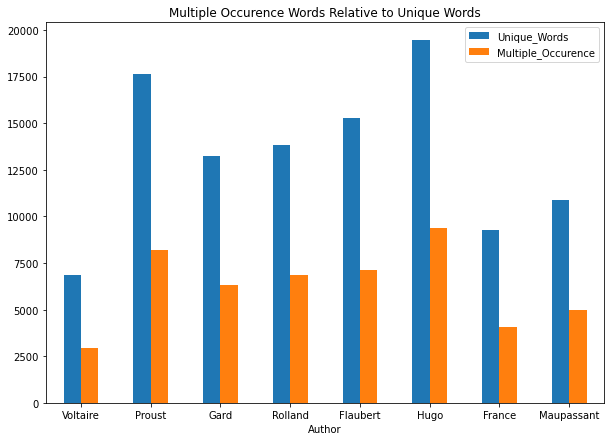

In [30]:
hist = texts_stats.plot.bar(x='Author', y=['Unique_Words','Multiple_Occurence'], rot=0, figsize=(10,7), title='Multiple Occurence Words Relative to Unique Words')

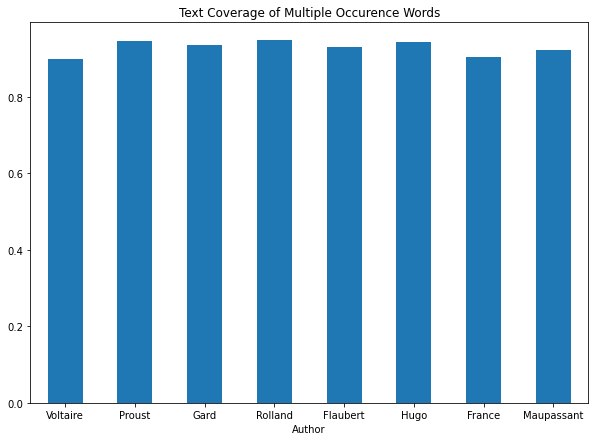

In [31]:
hist = texts_stats.plot.bar(x='Author', y='Text_Coverage', rot=0, figsize=(10,7), legend=False, title = 'Text Coverage of Multiple Occurence Words')

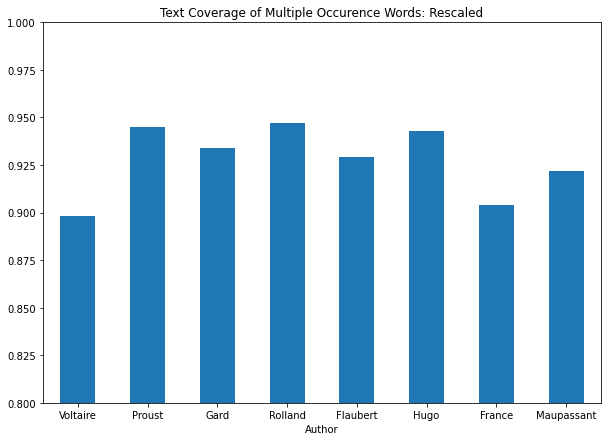

In [32]:
hist = texts_stats.plot.bar(x='Author', y='Text_Coverage', rot=0, figsize=(10,7), legend=False, ylim=(0.8,1.0), title = 'Text Coverage of Multiple Occurence Words: Rescaled')

So, we have found that if we focus our attention on solidfying our recognition of words that occur more than once in the text, we will always have at least 90% coverage of the text.  

<a id='common'></a><h2>Most Common Words</h2>

Based on the previous section, we now have some substantiation that our approach is tenable.  As such, we can view the unique words in our text, in descending order of their counts:

In [40]:
#taking most_common without an argument is a quick way to sort the results
Counter(voltaire_clean).most_common(10)

[('de', 1506),
 ('et', 1042),
 ('le', 818),
 ('la', 785),
 ('à', 690),
 ('les', 614),
 ('que', 529),
 ('il', 466),
 ('un', 464),
 ('candide', 434)]

The Voltaire text contains 2916 unique words that occur more than once.  This is certainly not a small number to try and tackle.  However, there are a few considerations to which it is worth drawing our attention.  First, as a reminder, these are individual instances and not word families, so many of these entries are very closely connected.  Second, many of these entries wouldn't pose a problem for someone experienced with the language, e.g. low-level vocabulary, latin numerals, singular and plural forms being listed as distinct, so the amount to learn is much smaller than the raw count indicates.  Finally, as the above indicates many of the most frequent words are, naturally, very common articles, prepositions, etc.  If we visualize the cumulative sum of all the words:

<AxesSubplot:>

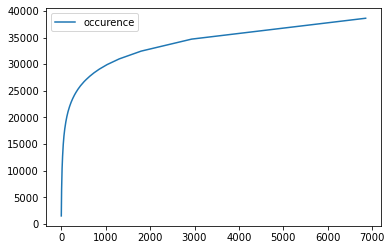

In [34]:
data = Counter(voltaire_clean).most_common()
df = pd.DataFrame(data, columns =['word', 'occurence'])
df.sort_index().cumsum().plot()

we can see that the first 1000 entries contribute about 75% of the total coverage.  If one is ready to tackle French literature in French, a quick read-through of the given list will very quickly cull it down to a more manageable task (a very simple function that checks inclusion in the list based on a blacklist of words you are comfortable with would be simple enough to write, if you were so inclined).  How many of those words one should tackle before diving into the text is, by necessity, up to you.  And, certainly, how to actually learn and remember the words we have flagged as priority is not task I am qualified to give advice on; my guess is patience and repetition.

<a id='corpus'></a><h2>The Entire Corpus</h2>

Out of curiosity, I would also like to view our descriptive statistics as they relate to the entire corpus of our eight works.

In [35]:
corpus = voltaire_clean + proust_clean + gard_clean + rolland_clean + flaubert_clean + hugo_clean + france_clean + maupassant_clean 

In [36]:
stats(corpus)

{'Total words in text': 864062,
 'Unique words in text': 45275,
 'Unique words that occur more than once': 26094,
 'Unique words that occur exactly once': 19181,
 'Text coverage of words that occur more than once': 0.9778013614763755,
 'Text coverage of words that occur exactly once': 0.022198638523624463}

It is interesting to note that the largest number of unique words for any single text was 19440 (Hugo) and for the entire corpus this figure has more than doubled.  I think this demonstrates significantly different lexicons employed by the authors, much of which might be explained by the time differences between the texts' production.  I would enjoy seeing this fleshed out.  

I think it is also interesting that the coverage of the corpus by words that occur more than once is a few percentage points higher than any of the individual texts.  This must indicate that the specialized language employed in one text (i.e. single occurence words) is not so specialized on a larger scale.  I suppose this is somewhat obvious, but I think there is still room to explore how those single instance words in one text are used across multiple texts, comparing the various intentions of doing so, and elucidating what kinds of words actually serve this function.

<a id='saving'></a><h2>Saving Your Results</h2>

To end this project, I would like to provide a simple function to export the unique words that occur more than once, without their counts, so that we have a document we can print or reference, as needed.

In [37]:
#to be able to save the nonsingle instance words, without the counts
def get_multiple(tokens):
    c = Counter(tokens)
    c_focused = Counter({k: c for k, c in c.items() if c >= 2})
    c_sorted = c_focused.most_common()
    result = [x[0] for x in c_sorted]
    return result

In [38]:
#save to text file
vocab = get_multiple(voltaire_clean)

#feel free to choose your own delimiter; I chose the simple option of copious white space
vocab_string = '    '.join(vocab)
with io.open('voltaire_vocab.txt', 'w', encoding='utf8') as file:
    file.write(vocab_string)

Happy languaging!